# Define parameters

In [1]:
%matplotlib widget
import os, sys
module_path = os.path.abspath(os.path.join('funcs'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
import matplotlib.pyplot as plt
from physical_models import VdP
rng = np.random.default_rng(0)

dt_t = 2e-4

true_params = dict(model=VdP,
                   t_start=0.5,
                   t_stop=1.,
                   t_max=1.5,
                   Nt_obs=30,
                   dt=dt_t,
                   psi0=rng.random(2)+5,
                   std_obs=0.2,
                   noise_type='gauss,additive'
                   )

forecast_params = dict(filter='EnKF',
                       m=10,
                       dt=dt_t,
                       model=VdP,
                       est_a=dict(zeta=(40, 80.)
                                 ),
                       std_psi=0.3,
                       alpha_distr='uniform',
                       inflation=1.01
                       )




# Run simulation

In [2]:

from create import create_truth, create_ensemble
from DA import dataAssimilation


truth = create_truth(**true_params)
y_obs, t_obs = [truth[key].copy() for key in ['y_obs', 't_obs']]

ensemble = create_ensemble(**forecast_params)
filter_ens = dataAssimilation(ensemble.copy(), y_obs=y_obs, t_obs=t_obs, std_obs=0.01)


 ------------------ VdP Model Parameters ------------------ 
	 Nq = 1
	 beta = 70.0
	 dt = 0.0002
	 gamma = 1.7
	 kappa = 4.0
	 law = tan
	 omega = 753.982
	 zeta = 60.0

 ---------------- NoBias bias model parameters --------------- 
	 N_ens = 1
	 bayesian_update = False
	 biased_observations = False
	 upsample = 1

 -------------------- ASSIMILATION PARAMETERS -------------------- 
 	 Filter = EnKF  
	 bias = NoBias 
 	 m = 10 
 	 Time steps between analysis = None 
 	 Inferred params = ['zeta'] 
 	 Inflation = 1.01 
 	 Ensemble std(psi0) = 0.3
 	 Ensemble std(alpha0) = {'zeta': (40, 80.0)}
 	 Number of analysis steps = 84, t0=0.4998, t1=0.9978
 --------------------------------------------
Elapsed time to first observation: 3.7810871601104736 s
Assimilation progress: 
	0 % 10% 19% 29% 38% 48% 57% 67% 76% 86% 100% ----------------

Elapsed time during assimilation: 0.32842111587524414 s


# Plot results

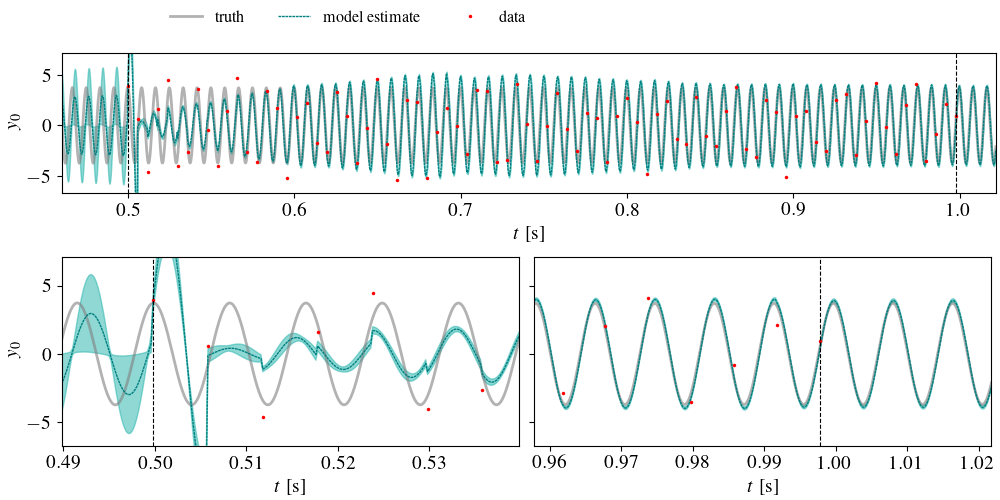

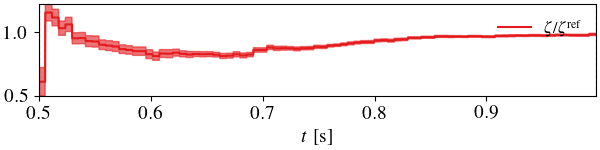

In [3]:

from plotResults import plot_timeseries, plot_parameters, plot_attractor

# Visualize attractors
case0 = truth['case'].copy()
case1 = filter_ens.copy()

# Forecast the ensemble further without assimilation
ens = filter_ens.copy()
psi, t = ens.time_integrate(int(4 * true_params['Nt_obs']), averaged=False)
ens.update_history(psi, t)

plot_timeseries(ens, truth, plot_ensemble_members=False)
plot_parameters(ens, truth, reference_p=VdP.defaults)
